### Group 6  Homework1.31 

Group Member: Haijing ZHU, Ting ZHU, Huajuan ZHOU, You SHAN, Zhen XING

#### Version 1:

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random

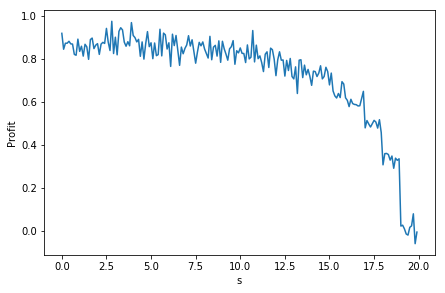

The optimal value of s is:  2.8


In [4]:
S=20
p = 0.5
c=2
sim_length = 1000
x0=10
fig, ax = plt.subplots(figsize=(7, 4.5))
def profit(s):
    def ϕ():
        return np.random.geometric(p) - 1
    def G(x, d):
        if x <= s:
            return max(S - d, 0)
        else:
            return max(x - d, 0)
    X = np.empty(sim_length)
    X[0] = x0
    def h_s(x):
        if x<=s:
            return S
        else:
            return x
    π=np.empty(sim_length-1)
    for t in range(sim_length-1):
        D = ϕ()
        X[t+1] = G(X[t], D)
        if X[t]<=s:
            π[t]=min(h_s(X[t]),D)-c
        else:
            π[t]=min(h_s(X[t]),D)
    ave=sum(π)/(sim_length-1)
    return ave
z=np.arange(0,20,0.1)
y=np.empty(len(z))
for i in range(len(z)):
    y[i]=profit(z[i])
ax.plot(z,y)
ax.set_xlabel('s')
ax.set_ylabel('Profit')
plt.show()
max_value=max(y)
max_index=np.argmax(y)
print('The optimal value of s is: ',z[max_index])

#### Version 2: 

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [6]:
S=20
p=0.5
c=2
Y=[]
n=20
for s in range(n):
    def ϕ():
        return np.random.geometric(p) - 1
    def inventory(x, d):
        if x <= s:
            return max(S - d, 0)
        else:
            return max(x - d, 0)
    def h(x):
        if x <= s:
            return S
        else:
            return x
    def π(x):
        y=ϕ()
        if x <= s:
            return min(h(x),y)-c
        else:
            return min(h(x),y)
        
    sim_length = 1000
    X = np.empty(sim_length)
    X[0] = 50
    
    for t in range(sim_length-1):
        D = ϕ()
        X[t+1] = inventory(X[t], D)
    π=np.vectorize(π)
    y=π(X).mean()
    Y.append(y)

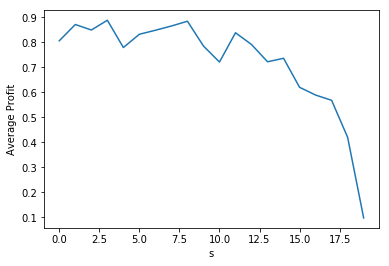

The optimal value of s is 3


In [7]:
S=np.arange(20)
plt.plot(S,Y)
plt.xlabel('s')
plt.ylabel("Average Profit")
plt.show()
print(f"The optimal value of s is {Y.index(max(Y))}")

#### Version 3: 

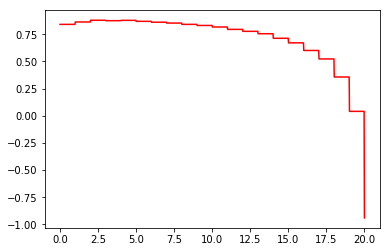

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import numba

p=0.5
S=20
s = np.linspace(0, 20, 1000)

x=50
z=1000
c = 2

eπ = np.empty(len(s))
D = np.random.geometric(p, size=z-1) - 1
X = np.empty(z)
X[0] = x

for i in range(len(s)):
        
    h = np.empty(z-1)
    π = np.empty(z-1)
        
        
    for j, d in enumerate(D):
        x = X[j]
        if x <= s[i]:
            I=1
            X[j+1] = max(S - d, 0)
                
        else:
            I=0
            X[j+1] = max(x - d, 0)
        h[j] = x + (S - x ) * I
        π[j] = min(h[j], d) - c * I
    eπ[i] = np.mean(π)
m=eπ

plt.plot(s, m,'-r')
plt.show() 

#### Version 4

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from numba import jit, prange

In [7]:
def ϕ():
    return np.random.geometric(p) - 1
S = 20
p = 0.5
c = 2
s = np.linspace(0,20,100)
sim_length = 1000
X = np.empty(sim_length)
X[0] = 50

In [11]:
aver_π = np.empty(len(s))
for j in range(len(s)):
    def G(x, d):
        if x <= s[j]:
            return max(S - d, 0)
        else:
            return max(x - d, 0)
    def h(x):
        if x <= s[j]:
            return S
        else:
            return x
    def I(x):
        if x<=s[j]:
            return 1
        else:
            return 0
    π = np.empty(sim_length)

    for t in range(sim_length-1):
        D = ϕ()
        π[t] = min(h(X[t]),D) - (c * I(X[t]))
        X[t+1] = G(X[t], D)
        
    aver_π[j] =sum(π)/sim_length

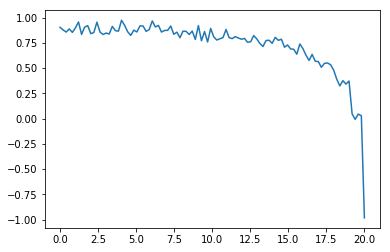

Wall time: 136 ms


In [12]:
fig, ax = plt.subplots()
ax.plot(s, aver_π, label="average profit")
%time plt.show()

In [13]:
opti = aver_π.argmax()
s[opti]
print('The s which Maximize long run average profits for the firm is ',s[opti])

The s which Maximize long run average profits for the firm is  4.0404040404
